In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Aggregate results across all networks

In [2]:
nets = [
    'friedrichshain-center',
    'berlin-mitte-center',
    'berlin-mitte-prenzlauerberg-friedrichshain-center',
    'berlin-prenzlauerberg-center',
    'berlin-tiergarten',
    'SiouxFalls'
]

df = pd.DataFrame(columns=['net', 'mean', 'sd', 'tstt', 'congestion', 'vmt', 'flows_rmse', 'most_congested_link_vc'])
for net in nets:
    # read 0 SD trials
    dft = pd.read_csv(f'output/data/{net}_trials_means_only.csv')
    dft['net'] = net
    dft['sd'] = 0.0
    df = df.append(dft, ignore_index=True, sort=False)
    
    # read variable SD trials
    dft = pd.read_csv(f'output/data/{net}_trials.csv')
    dft['net'] = net
    df = df.append(dft, ignore_index=True, sort=False)
    
df.sample(10)

,net,mean,sd,tstt,congestion,vmt,flows_rmse,most_congested_link_vc
15179,berlin-mitte-center,1.25,0.050,1.379357e+06,0.000676,2.732194e+07,92.246430,1.394892
10921,friedrichshain-center,0.25,0.005,1.422439e+05,0.000500,4.295165e+06,284.859675,0.603056
27769,berlin-mitte-prenzlauerberg-friedrichshain-center,0.25,0.010,5.713093e+05,0.000060,1.441549e+07,262.143420,0.443477
49583,berlin-tiergarten,0.25,0.050,1.729506e+05,0.000191,4.287152e+06,241.196571,0.378105
13976,berlin-mitte-center,1.50,0.010,1.730546e+06,0.000768,3.308004e+07,184.574607,1.398763
1571,friedrichshain-center,1.75,0.001,1.554844e+06,0.001825,3.154994e+07,305.505481,1.636822
23458,berlin-mitte-prenzlauerberg-friedrichshain-center,1.50,0.100,3.706164e+06,0.000279,8.543627e+07,177.998346,1.341786
16950,berlin-mitte-center,1.00,0.020,1.051986e+06,0.000572,2.178474e+07,1.450451,1.159925
20976,berlin-mitte-center,0.25,0.500,3.057846e+05,0.000240,6.923382e+06,237.365075,0.429993
52492,SiouxFalls,1.75,0.020,6.539612e+07,0.032607,6.278936e+06,10468.012198,4.483873


In [3]:
summary = df.groupby(['net', 'mean', 'sd'])
summary.count()

tstt  congestion  vmt  flows_rmse  \
net                   mean sd                                         
SiouxFalls            0.00 0.000     1           0    1           1   
                      0.25 0.000     1           1    1           1   
                           0.001   500         500  500         500   
                           0.005   500         500  500         500   
                           0.010   500         500  500         500   
                           0.020   500         500  500         500   
                           0.050   500         500  500         500   
                           0.100   500         500  500         500   
                           0.200   500         500  500         500   
                           0.500   500         500  500         500   
                      0.50 0.000     1           1    1           1   
                           0.001   500         500  500         500   
                           0.005   500         500  500         500   
                           0.010   500         500  500         500   
                           0.020   500         500  500         500   
                           0.050   500         500  500         500   
                           0.100   500         500  500         500   
                           0.200   500         500  500         500   
                           0.500   500         500  500         500   
                      0.75 0.000     1           1    1           1   
                           0.001   500         500  500         500   
                           0.005   500         500  500         500   
                           0.010   500         500  500         500   
                           0.020   500         500  500         500   
                           0.050   500         500  500         500   
                           0.100   500         500  500         500   
                           0.200   500         500  500         500   
                           0.500   500         500  500         500   
                      1.00 0.000     1           1    1           1   
                           0.001   500         500  500         500   
...                                ...         ...  ...         ...   
friedrichshain-center 1.00 0.100   200         200  200         200   
                           0.200   200         200  200         200   
                           0.500   200         200  200         200   
                      1.25 0.000     1           1    1           1   
                           0.001   200         200  200         200   
                           0.005   200         200  200         200   
                           0.010   200         200  200         200   
                           0.020   200         200  200         200   
                           0.050   200         200  200         200   
                           0.100   200         200  200         200   
                           0.200   200         200  200         200   
                           0.500   200         200  200         200   
                      1.50 0.000     1           1    1           1   
                           0.001   200         200  200         200   
                           0.005   200         200  200         200   
                           0.010   200         200  200         200   
                           0.020   200         200  200         200   
                           0.050   200         200  200         200   
                           0.100   200         200  200         200   
                           0.200   200         200  200         200   
                           0.500   200         200  200         200   
                      1.75 0.000     1           1    1           1   
                           0.001   200         200  200         200   
                           0.005   200         200  200   

In [4]:
df_summary = summary.describe()
df_summary.head()

tstt                                             \
                       count           mean          std            min   
net        mean sd                                                        
SiouxFalls 0.00 0.000    1.0       0.000000          NaN       0.000000   
           0.25 0.000    1.0  827795.842475          NaN  827795.842475   
                0.001  500.0  827803.711459   215.655739  827112.291785   
                0.005  500.0  827878.637779  1141.372647  824469.819203   
                0.010  500.0  827701.832464  2310.736910  820147.626448   

                                                                    \
                                 25%            50%            75%   
net        mean sd                                                   
SiouxFalls 0.00 0.000       0.000000       0.000000       0.000000   
           0.25 0.000  827795.842475  827795.842475  827795.842475   
                0.001  827677.344163  827798.856421  827945.877275   
                0.005  827138.460480  827821.075633  828670.330777   
                0.010  826118.721405  827678.319033  829321.777307   

                                     congestion            ...    flows_rmse  \
                                 max      count      mean  ...           75%   
net        mean sd                                         ...                 
SiouxFalls 0.00 0.000       0.000000        0.0       NaN  ...  12466.195912   
           0.25 0.000  827795.842475        1.0  0.006772  ...   9521.677677   
                0.001  828482.063728      500.0  0.006772  ...   9522.086615   
                0.005  831395.419309      500.0  0.006772  ...   9523.714573   
                0.010  834315.685760      500.0  0.006768  ...   9526.289959   

                                    most_congested_link_vc            \
                                max                  count      mean   
net        mean sd                                                     
SiouxFalls 0.00 0.000  12466.195912                    1.0  0.000000   
           0.25 0.000   9521.677677                    1.0  0.825279   
                0.001   9523.532869                  500.0  0.825293   
                0.005   9531.738486                  500.0  0.825339   
                0.010   9542.136871                  500.0  0.825979   

                                                                         \
                            std       min       25%       50%       75%   
net        mean sd                                                        
SiouxFalls 0.00 0.000       NaN  0.000000  0.000000  0.000000  0.000000   
           0.25 0.000       NaN  0.825279  0.825279  0.825279  0.825279   
                0.001  0.000617  0.823344  0.824864  0.825307  0.825724   
                0.005  0.003052  0.817978  0.823372  0.825229  0.827375   
                0.010  0.005567  0.809003  0.822202  0.825882  0.829534   

                                 
                            max  
net        mean sd               
SiouxFalls 0.00 0.000  0.000000  
           0.25 0.000  0.825279  
                0.001  0.827208  
                0.005  0.833662  
                0.010  0.843420  

[5 rows x 40 columns]

In [5]:
df_trel = df.copy()
to_change = ['tstt', 'congestion', 'vmt', 'most_congested_link_vc']
for net in nets:
    true_row_values = df_trel.loc[(df_trel['net'] == net) & (df_trel['mean'] == 1) & (df_trel['sd'] == 0), to_change]
    df_trel.loc[(df_trel['net'] == net), to_change] /= true_row_values.squeeze()
df_trel.sample(10)

,net,mean,sd,tstt,congestion,vmt,flows_rmse,most_congested_link_vc
36336,berlin-prenzlauerberg-center,0.50,0.200,0.457157,0.588883,0.497497,305.862410,0.748773
18759,berlin-mitte-center,0.75,0.010,0.724356,0.822601,0.753285,91.900600,0.746408
73165,SiouxFalls,0.50,0.010,0.249469,0.562127,0.473812,6598.848623,0.594140
42170,berlin-tiergarten,1.50,0.005,1.613697,1.330939,1.527420,158.973046,1.123229
47829,berlin-tiergarten,0.50,0.100,0.480033,0.611611,0.500774,165.054104,0.677198
13324,berlin-mitte-center,1.50,0.100,1.643858,1.341216,1.516393,183.968157,1.205956
56823,SiouxFalls,1.50,0.020,4.399385,1.445323,1.566047,7171.292584,1.507583
57473,SiouxFalls,1.50,0.005,4.393977,1.444752,1.566732,7184.659750,1.507889
21799,berlin-mitte-center,0.25,0.020,0.230802,0.348078,0.255345,258.258184,0.249659
39808,berlin-tiergarten,1.75,0.100,1.961933,1.497380,1.790117,235.878472,1.183377


In [6]:
summary_trel = df_trel.groupby(['net', 'mean', 'sd'])
summary_trel.count()

tstt  congestion  vmt  flows_rmse  \
net                   mean sd                                         
SiouxFalls            0.00 0.000     1           0    1           1   
                      0.25 0.000     1           1    1           1   
                           0.001   500         500  500         500   
                           0.005   500         500  500         500   
                           0.010   500         500  500         500   
                           0.020   500         500  500         500   
                           0.050   500         500  500         500   
                           0.100   500         500  500         500   
                           0.200   500         500  500         500   
                           0.500   500         500  500         500   
                      0.50 0.000     1           1    1           1   
                           0.001   500         500  500         500   
                           0.005   500         500  500         500   
                           0.010   500         500  500         500   
                           0.020   500         500  500         500   
                           0.050   500         500  500         500   
                           0.100   500         500  500         500   
                           0.200   500         500  500         500   
                           0.500   500         500  500         500   
                      0.75 0.000     1           1    1           1   
                           0.001   500         500  500         500   
                           0.005   500         500  500         500   
                           0.010   500         500  500         500   
                           0.020   500         500  500         500   
                           0.050   500         500  500         500   
                           0.100   500         500  500         500   
                           0.200   500         500  500         500   
                           0.500   500         500  500         500   
                      1.00 0.000     1           1    1           1   
                           0.001   500         500  500         500   
...                                ...         ...  ...         ...   
friedrichshain-center 1.00 0.100   200         200  200         200   
                           0.200   200         200  200         200   
                           0.500   200         200  200         200   
                      1.25 0.000     1           1    1           1   
                           0.001   200         200  200         200   
                           0.005   200         200  200         200   
                           0.010   200         200  200         200   
                           0.020   200         200  200         200   
                           0.050   200         200  200         200   
                           0.100   200         200  200         200   
                           0.200   200         200  200         200   
                           0.500   200         200  200         200   
                      1.50 0.000     1           1    1           1   
                           0.001   200         200  200         200   
                           0.005   200         200  200         200   
                           0.010   200         200  200         200   
                           0.020   200         200  200         200   
                           0.050   200         200  200         200   
                           0.100   200         200  200         200   
                           0.200   200         200  200         200   
                           0.500   200         200  200         200   
                      1.75 0.000     1           1    1           1   
                           0.001   200         200  200         200   
                           0.005   200         200  200   

In [7]:
df_summary_trel = summary_trel.describe()
df_summary_trel.head()

tstt                                          \
                       count      mean       std       min       25%   
net        mean sd                                                     
SiouxFalls 0.00 0.000    1.0  0.000000       NaN  0.000000  0.000000   
           0.25 0.000    1.0  0.110665       NaN  0.110665  0.110665   
                0.001  500.0  0.110666  0.000029  0.110574  0.110650   
                0.005  500.0  0.110676  0.000153  0.110221  0.110577   
                0.010  500.0  0.110653  0.000309  0.109643  0.110441   

                                                    congestion            ...  \
                            50%       75%       max      count      mean  ...   
net        mean sd                                                        ...   
SiouxFalls 0.00 0.000  0.000000  0.000000  0.000000        0.0       NaN  ...   
           0.25 0.000  0.110665  0.110665  0.110665        1.0  0.349142  ...   
                0.001  0.110666  0.110685  0.110757      500.0  0.349145  ...   
                0.005  0.110669  0.110782  0.111147      500.0  0.349170  ...   
                0.010  0.110650  0.110869  0.111537      500.0  0.348928  ...   

                         flows_rmse               most_congested_link_vc  \
                                75%           max                  count   
net        mean sd                                                         
SiouxFalls 0.00 0.000  12466.195912  12466.195912                    1.0   
           0.25 0.000   9521.677677   9521.677677                    1.0   
                0.001   9522.086615   9523.532869                  500.0   
                0.005   9523.714573   9531.738486                  500.0   
                0.010   9526.289959   9542.136871                  500.0   

                                                                         \
                           mean       std       min       25%       50%   
net        mean sd                                                        
SiouxFalls 0.00 0.000  0.000000       NaN  0.000000  0.000000  0.000000   
           0.25 0.000  0.322757       NaN  0.322757  0.322757  0.322757   
                0.001  0.322763  0.000241  0.322000  0.322595  0.322768   
                0.005  0.322781  0.001194  0.319902  0.322011  0.322738   
                0.010  0.323031  0.002177  0.316392  0.321554  0.322993   

                                           
                            75%       max  
net        mean sd                         
SiouxFalls 0.00 0.000  0.000000  0.000000  
           0.25 0.000  0.322757  0.322757  
                0.001  0.322931  0.323512  
                0.005  0.323577  0.326036  
                0.010  0.324421  0.329852  

[5 rows x 40 columns]

## Plot summary

In [8]:
df_sum4plot = df_summary.reset_index()
df_sum4plot.head()

net  mean     sd   tstt                                             \
                            count           mean          std            min   
0  SiouxFalls  0.00  0.000    1.0       0.000000          NaN       0.000000   
1  SiouxFalls  0.25  0.000    1.0  827795.842475          NaN  827795.842475   
2  SiouxFalls  0.25  0.001  500.0  827803.711459   215.655739  827112.291785   
3  SiouxFalls  0.25  0.005  500.0  827878.637779  1141.372647  824469.819203   
4  SiouxFalls  0.25  0.010  500.0  827701.832464  2310.736910  820147.626448   

                                                ...    flows_rmse  \
             25%            50%            75%  ...           75%   
0       0.000000       0.000000       0.000000  ...  12466.195912   
1  827795.842475  827795.842475  827795.842475  ...   9521.677677   
2  827677.344163  827798.856421  827945.877275  ...   9522.086615   
3  827138.460480  827821.075633  828670.330777  ...   9523.714573   
4  826118.721405  827678.319033  829321.777307  ...   9526.289959   

                most_congested_link_vc                                \
            max                  count      mean       std       min   
0  12466.195912                    1.0  0.000000       NaN  0.000000   
1   9521.677677                    1.0  0.825279       NaN  0.825279   
2   9523.532869                  500.0  0.825293  0.000617  0.823344   
3   9531.738486                  500.0  0.825339  0.003052  0.817978   
4   9542.136871                  500.0  0.825979  0.005567  0.809003   

                                           
        25%       50%       75%       max  
0  0.000000  0.000000  0.000000  0.000000  
1  0.825279  0.825279  0.825279  0.825279  
2  0.824864  0.825307  0.825724  0.827208  
3  0.823372  0.825229  0.827375  0.833662  
4  0.822202  0.825882  0.829534  0.843420  

[5 rows x 43 columns]

In [9]:
df_trel_sum4plot = df_summary_trel.reset_index()
df_trel_sum4plot.head()

net  mean     sd   tstt                                          \
                            count      mean       std       min       25%   
0  SiouxFalls  0.00  0.000    1.0  0.000000       NaN  0.000000  0.000000   
1  SiouxFalls  0.25  0.000    1.0  0.110665       NaN  0.110665  0.110665   
2  SiouxFalls  0.25  0.001  500.0  0.110666  0.000029  0.110574  0.110650   
3  SiouxFalls  0.25  0.005  500.0  0.110676  0.000153  0.110221  0.110577   
4  SiouxFalls  0.25  0.010  500.0  0.110653  0.000309  0.109643  0.110441   

                       ...    flows_rmse               most_congested_link_vc  \
        50%       75%  ...           75%           max                  count   
0  0.000000  0.000000  ...  12466.195912  12466.195912                    1.0   
1  0.110665  0.110665  ...   9521.677677   9521.677677                    1.0   
2  0.110666  0.110685  ...   9522.086615   9523.532869                  500.0   
3  0.110669  0.110782  ...   9523.714573   9531.738486                  500.0   
4  0.110650  0.110869  ...   9526.289959   9542.136871                  500.0   

                                                                         
       mean       std       min       25%       50%       75%       max  
0  0.000000       NaN  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.322757       NaN  0.322757  0.322757  0.322757  0.322757  0.322757  
2  0.322763  0.000241  0.322000  0.322595  0.322768  0.322931  0.323512  
3  0.322781  0.001194  0.319902  0.322011  0.322738  0.323577  0.326036  
4  0.323031  0.002177  0.316392  0.321554  0.322993  0.324421  0.329852  

[5 rows x 43 columns]

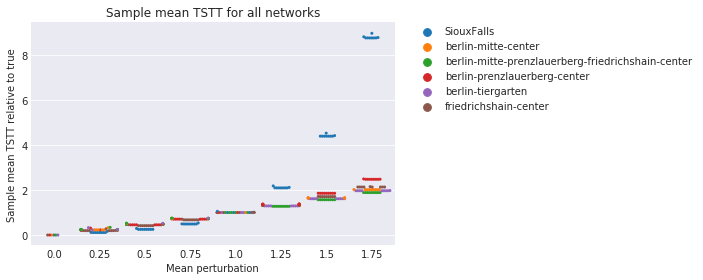

In [10]:
def plot_metric_dist_over_networks(metric, which, rel=False):
    plt.figure(figsize=(10,4))
    sns.swarmplot('mean', (metric.lower(), which), 'net', data=(df_trel_sum4plot if rel else df_sum4plot), size=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel(f'Sample {which} {metric}' + (' relative to true' if rel else ''))
    plt.xlabel('Mean perturbation')
    plt.title(f'Sample {which} {metric} for all networks')
    plt.tight_layout()
    relstring = '_rel' if rel else ''
    plt.savefig(f'output/plots/all_{metric.lower()}_sample_{which}{relstring}.png', dpi='figure')
    plt.show()

plot_metric_dist_over_networks('TSTT', 'mean', rel=True)

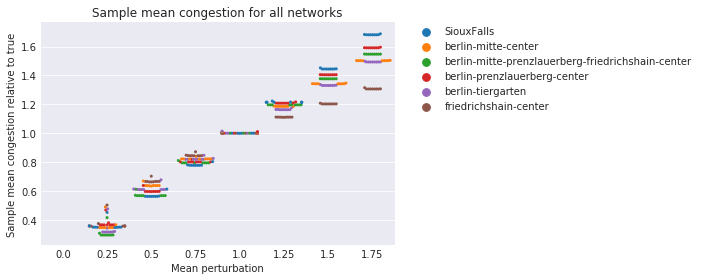

In [11]:
plot_metric_dist_over_networks('congestion', 'mean', rel=True)

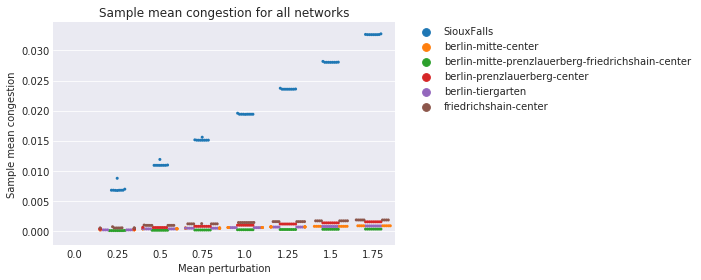

In [12]:
plot_metric_dist_over_networks('congestion', 'mean', rel=False)

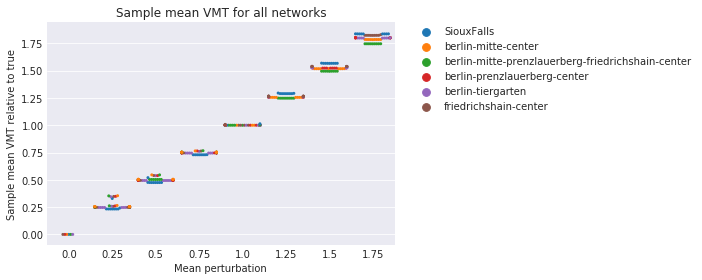

In [13]:
plot_metric_dist_over_networks('VMT', 'mean', rel=True)

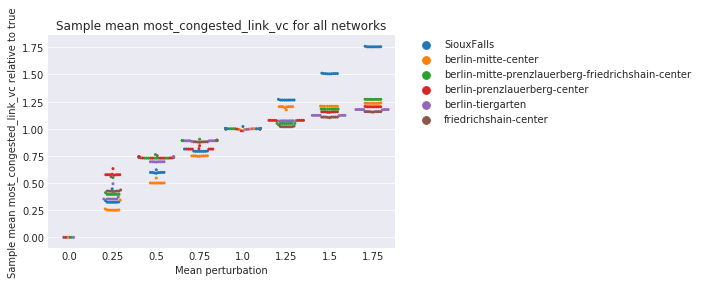

In [14]:
plot_metric_dist_over_networks('most_congested_link_vc', 'mean', rel=True)

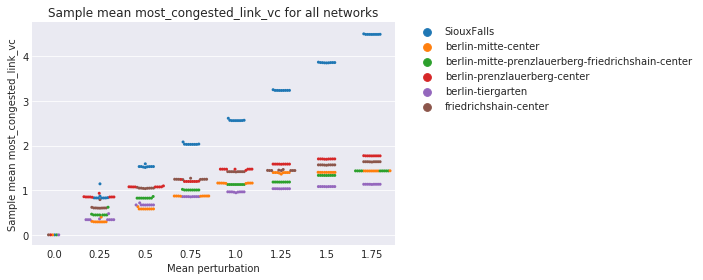

In [15]:
plot_metric_dist_over_networks('most_congested_link_vc', 'mean', rel=False)

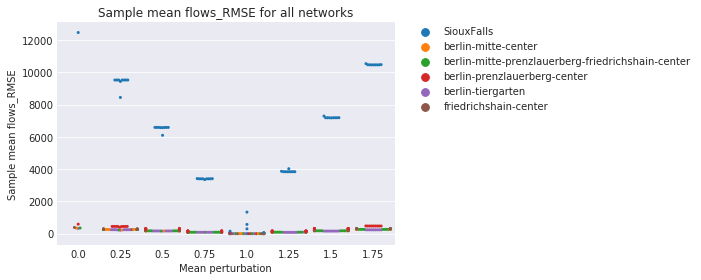

In [16]:
plot_metric_dist_over_networks('flows_RMSE', 'mean', rel=False)

# Format DataFrames for $\LaTeX$

In [17]:
for net in nets:
    df_summary.loc[net].to_latex(f'output/latex/summary_{net}.tex',
                                 columns=[p for p in df_summary.columns.values if (p[1] != 'count')],
                                 float_format="{:0.2f}".format, multicolumn=True, multirow=True, longtable=False)

In [18]:
means = df['mean'].unique()
means.sort()
means

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75])

In [19]:
sds = df['sd'].unique()
sds.sort()
sds

array([0.   , 0.001, 0.005, 0.01 , 0.02 , 0.05 , 0.1  , 0.2  , 0.5  ])